# LeNet-5 - An introduction and overview

Perhaps the first widely known and successful application of convolutional neural networks was **LeNet-5**, described by Yann LeCun, et al. in their 1998 paper titled [Gradient-Based Learning Applied to Document Recognition](https://ieeexplore.ieee.org/document/726791). The system was developed for use in a handwritten character recognition problem and demonstrated on the **MNIST standard dataset**, achieving approximately 99.2% classification accuracy (or a 0.8% error rate). The network was then described as the central technique in a broader system referred to as **Graph Transformer Networks**.

It is a long paper, and perhaps the best part to focus on is Section II. B. that describes the LeNet-5 architecture. In that section, the paper describes the network as having **seven layers** with input **grayscale images** having the **shape 32 x 32**, the size of images in the MNIST dataset.



```
The model proposes a pattern of a convolutional layer followed by an average pooling layer, referred to as a subsampling layer.
```



This pattern is repeated two and a half times before the output feature maps are flattened and fed to some fully connected layers for interpretation and a final prediction. A picture of the network architecture is provided in the paper and reproduced below.

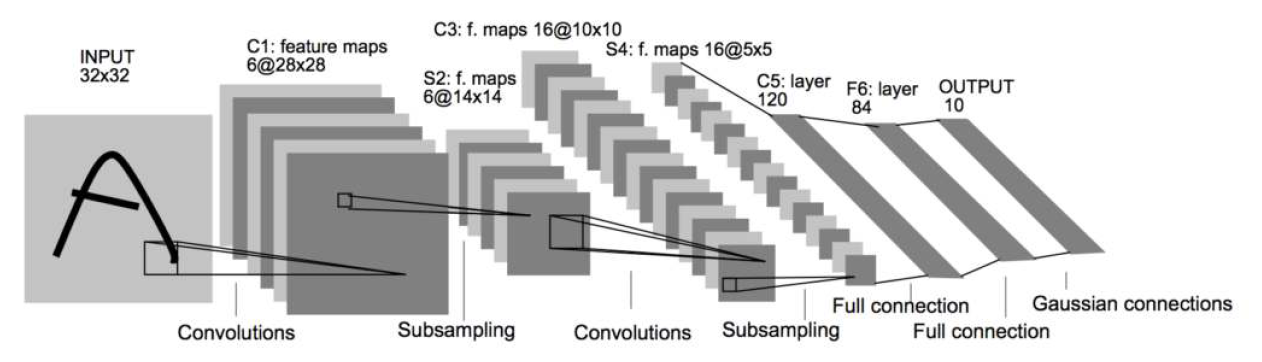

The pattern of blocks of convolutional layers and pooling layers (referred to as ***subsampling***) ***grouped*** and ***repeated*** **remains a typical pattern in designing and using convolutional neural networks today, more than twenty years later**. Interestingly, the architecture uses a small number of filters with a modest size as the first hidden layer, specifically 6 filters, each with 5x5 pixels. After pooling, another convolutional layer has many more filters, again with the same size, precisely 16 filters with 5x5 pixels, again followed by pooling. In the repetition of these two blocks of convolution and pooling layers, the trend increases the number of filters.

Compared to modern applications, the number of filters is also small, but **the trend of increasing the number of filters with the depth of the network also remains a common pattern in modern usage of the technique.** The flattening of the feature maps and interpretation and classification of the extracted features by fully connected layers also remains a common pattern today.



```
In modern terminology, the final section of the architecture is often referred to as the classifier, whereas the convolutional and 
pooling layers earlier in the model are referred to as the feature extractor.

```



We can summarize the key aspects of the architecture relevant in modern models as follows:



*   Fixed-sized input images.
*   Group convolutional and pooling layers into blocks.
*   Repetition of convolutional-pooling blocks in the architecture.
*   Increase in the number of filters with the depth of the network.
*   Distinct feature extraction and classifier parts of the architecture.

# Data Augmentation - A brief overview and explanation

According to [Goodfellow et al.](https://www.deeplearningbook.org/), regularization is


---
 “(...) any modification we make to a learning algorithm that is intended to 
reduce its generalization error, but not its training error”

---

In short, regularization seeks to reduce our testing error perhaps at the expense of increasing training error slightly.

We’ve already looked at different forms of regularization in the first part of course; however, these were parameterized forms of regularization, requiring us to update our loss/update function. In fact, there exist other types of regularization that either:



1.   Modify the network architecture itself.
2.   Augment the data passed into the network for training.



**Dropout** is a great example of modifying a network architecture by achieving greater generalizability. Here we insert a layer that randomly disconnects nodes from the previous layer to the next layer, thereby ensuring that no single node is responsible for learning how to represent a given class.

In this section we’ll be discussing another type of regularization called **data augmentation**. This method purposely perturbs training examples, changing their appearance slightly, before passing them into the network for training. The end result is that a network consistently sees “new” training data points generated from the original training data, partially alleviating the need for us to gather more training data (though in general, gathering more training data will rarely hurt your algorithm).

**Data augmentation** encompasses a wide range of techniques used to generate new training samples from the original ones by applying random jitters and perturbations such that the classes labels are not changed.



```
Our goal when applying data augmentation is to increase the generalizability of the model.

```



Given that our network is constantly seeing new, slightly modified versions of the input data points, it’s able to learn more robust features.



```
At testing time, we do not apply data augmentation
```



When evaluating our trained network – in most cases, you’ll see an increase in testing accuracy, perhaps at the expense at a slight dip in training accuracy.

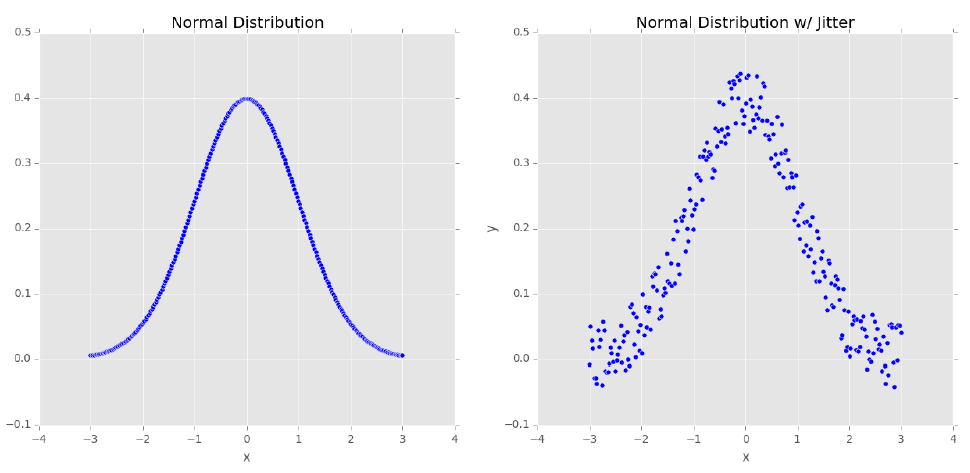

* **Left:** A sample of 250 data points that follow a normal distribution exactly.
* **Right:** Adding a small amount of random “jitter” to the distribution

This type of data augmentation can increase the generalizability of our networks.

Let’s consider the Figure above (left) of a normal distribution with zero mean and unit variance. Training a machine learning model on this data may result in us modeling the distribution exactly – however, in real-world applications, data rarely follows such a neat distribution.

Instead, to increase the generalizability of our classifier, we may first randomly jitter points along the distribution by adding some values e drawn from a random distribution (right). Our plot still follows an approximately normal distribution, but it’s not a perfect distribution as on the left. A model trained on this data is more likely to generalize to example data points not included in the training set. In the context of computer vision, data augmentation lends itself naturally.

For example, we can obtain additional training data from the original images by apply simple geometric transforms such as random:

1. Translations
2. Rotations
3. Changes in scale
4. Shearing
5. Horizontal (and in some cases, vertical) flips



Applying a (small) amount of these transformations to an input image will change its appearance slightly, but it does not change the class label – thereby making data augmentation a very natural, easy method to apply to deep learning for computer vision tasks.

# Model

Now we'll implement the same LeNet-5 we used before, but this time we're going to use Data Augmentation in the same MNIST dataset. And of course, we'll be using the W&B Sweep.

## Implementing LeNet-5

### Step 01: Setup

Start out by installing the experiment tracking library and setting up your free W&B account:



*   **pip install wandb** – Install the W&B library
*   **import wandb** – Import the wandb library
*   **wandb login** – Login to your W&B account so you can log all your metrics in one place



In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 33.3 MB/s 
     |████████████████████████████████| 182 kB 64.5 MB/s 
     |████████████████████████████████| 166 kB 68.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 166 kB 73.8 MB/s 
     |████████████████████████████████| 162 kB 79.3 MB/s 
     |████████████████████████████████| 162 kB 75.2 MB/s 
     |████████████████████████████████| 158 kB 76.7 MB/s 
     |████████████████████████████████| 157 kB 68.4 MB/s 
     |████████████████████████████████| 157 kB 78.6 MB/s 
     |████████████████████████████████| 157 kB 65.2 MB/s 
     |████████████████████████████████| 157 kB 61.2 MB/s 
     |████████████████████████████████| 157 kB 66.3 MB/s 
     |████████████████████████████████| 157 kB 73.8 MB/s 
     |████████████████████████████████| 157 kB 76.1 MB/s 
     |████████████████████████████████| 156 kB 76.2 MB/s 


Lets install CodeCabor: A Python package for tracking the carbon emissions produced by various kinds of computer programs, from straightforward algorithms to deep neural networks.


In [ ]:
!pip install codecarbon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 36.6 MB/s 
     |████████████████████████████████| 46 kB 4.9 MB/s 
     |████████████████████████████████| 66 kB 6.0 MB/s 


####  Import Packages and Connecting to W&B

Import the necessary packages

In [ ]:
import logging
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from codecarbon import EmissionsTracker
from tensorflow.keras.callbacks import Callback
from wandb.keras import WandbCallback
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import wandb
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

#### Configure logging

Reference for a logging object

In [ ]:
logger = logging.getLogger()

Set level of logging

In [ ]:
logger.setLevel(logging.INFO)

Creating handlers

In [ ]:
c_handler = logging.StreamHandler()
c_format = logging.Formatter(fmt="%(asctime)s %(message)s",datefmt='%d-%m-%Y %H:%M:%S')
c_handler.setFormatter(c_format)

Add handlers to the logger

In [ ]:
logger.handlers[0] = c_handler

### Step 02: Implementing

As we saw before that's basically the architecture of the LeNet we'll implement (but this time as we already did the same process in the previous notebook we'll focus in the data augmentation process and not so much in creating the LeNet-5 again):



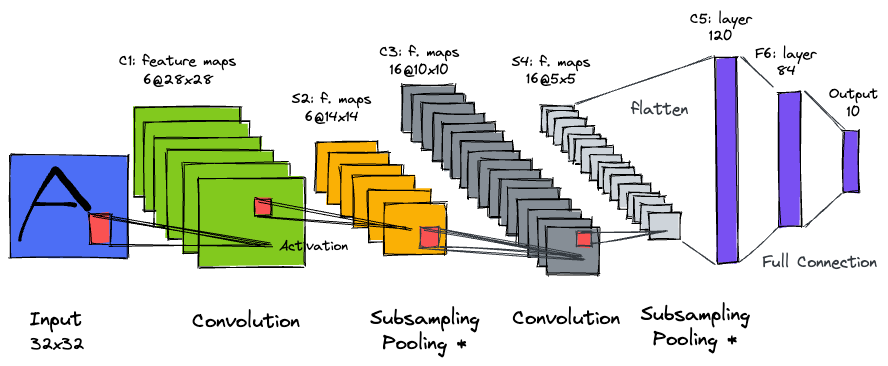

Source code based on **[Rosebrock, Adrian. Deep Learning For Computer vision with Python, 2019](https://pyimagesearch.com/deep-learning-computer-vision-python-book/)** 

In [ ]:
class LeNet:
  ''' 
  # create LeNet-5 model
  #
  # it is composed of the 8 layers (5 layers considering FC as one layer) 
  # such as:
  #      - 2 convolutional layers
  #      - 2 subsampling (avg pooling) layers
  #      - 1 flatten layer
  #      - 2 fully connected layers
  #      - 1 output layer with 10 outputs
  '''
  @staticmethod
  def build(width, height, depth, classes):
    # initialize the model
    model = Sequential()
    inputShape = (height, width, depth)
    
    # if we are using "channels first", update the input shape
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
   
    # first set of CONV => TANH => POOL layers
    model.add(Conv2D(6, (5,5), strides=1, padding='same',
                     activation='tanh', input_shape=(28,28,1), )) #C1
    model.add(AveragePooling2D()) #S2

    # second set of CONV => TANH => POOL layers
    model.add(Conv2D(16, (5,5), strides=1, padding='valid',
                     activation='tanh')) #C3
    model.add(AveragePooling2D()) #S4

    # a flatten and two set of FC => TANH layers
    model.add(Flatten()) #Flatten
    model.add(Dense(120, activation='tanh')) #C5
    model.add(Dense(84, activation='tanh')) #F6

    # softmax classifier
    model.add(Dense(10, activation='softmax')) #Output layer
    
    # return the constructed network architecture
    return model

### Step 03: LeNet-5 on MNIST

#### Fetch, Preprocessing and Data Segregation

In [ ]:
args = {
  "project_name": "lenet-5-augmentation"
}

In [ ]:
run = wandb.init(entity="euripedes",
                 project=args["project_name"], 
                 job_type="Train")

wandb: Currently logged in as: euripedes. Use `wandb login --relogin` to force relogin


In [ ]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a second)
logger.info("[INFO] accessing MNIST...")
((train_x, train_y), (test_x, test_y)) = mnist.load_data()

# if we are using "channels first" ordering, then reshape the
# design matrix such that the matrix is:
# num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	train_x = train_x.reshape((train_x.shape[0], 1, 28, 28))
	test_x = test_x.reshape((test_x.shape[0], 1, 28, 28))
 
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
	test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))

logger.info("Train x: {}".format(train_x.shape))
logger.info("Train y: {}".format(train_y.shape))
logger.info("Test x: {}".format(test_x.shape))
logger.info("Test y: {}".format(test_y.shape))

06-11-2022 00:06:24 [INFO] accessing MNIST...


11490434/11490434 [==============================] - 2s 0us/step


06-11-2022 00:06:27 Train x: (60000, 28, 28, 1)
06-11-2022 00:06:27 Train y: (60000,)
06-11-2022 00:06:27 Test x: (10000, 28, 28, 1)
06-11-2022 00:06:27 Test y: (10000,)


**Creating a function to help visualize the images:**

In [ ]:
def show_image(train_image, label, index):
    plt.subplot(3, 6, index+1)
    plt.imshow(tf.squeeze(train_image), cmap=plt.cm.gray)
    plt.title(label)
    plt.grid(b=False)

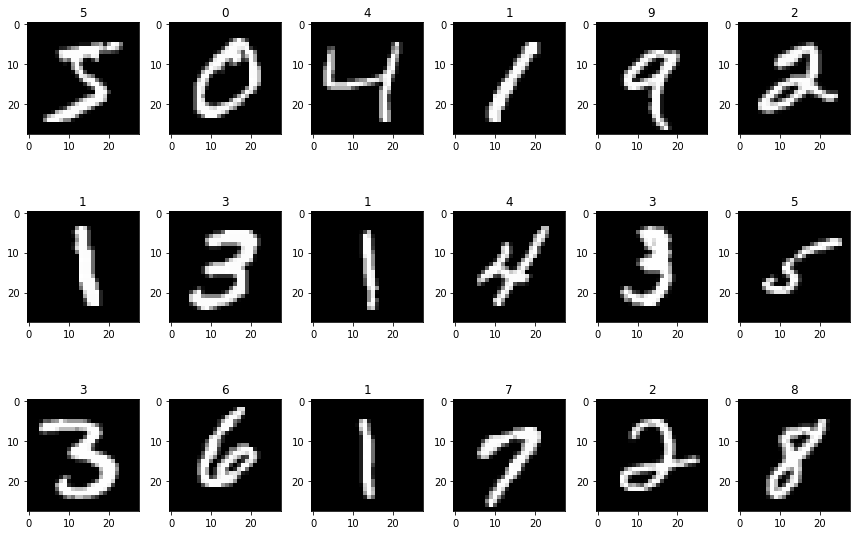

In [ ]:
# visualize the first 18 numbers
plt.figure(figsize=(12, 8))
for index in range(18):
    label = train_y[index]
    image_pixels = train_x[index,:,:,:]
    show_image(image_pixels, label, index)
plt.tight_layout()

Construct the image generator for data augmentation

[INFO] generating images...


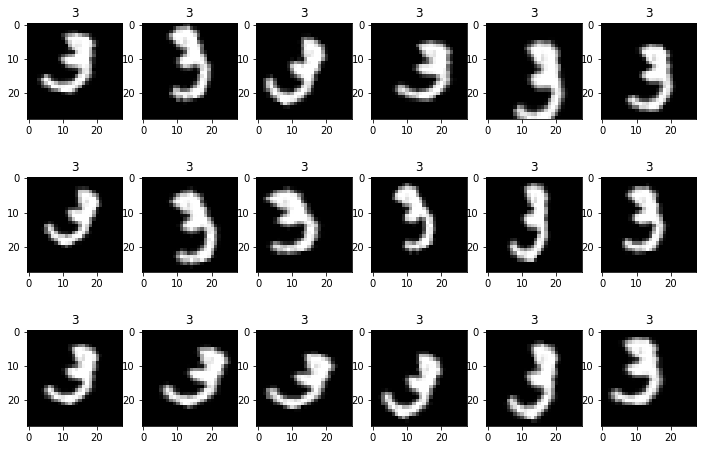

In [ ]:
# construct the image generator for data augmentation then
# initialize the total number of images generated thus far
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=False, fill_mode="nearest")
total = 0
image = train_x[10:11,:,:,:]

# construct the actual Python generator
print("[INFO] generating images...")
imageGen = aug.flow(image, batch_size=1)

# create a figure
plt.figure(figsize=(12, 8))

# loop over examples from our image data augmentation generator
for img in imageGen:

  show_image(img, train_y[10], total)

  # increment our counter
  total += 1

  # if we have reached 10 examples, break from the loop
  if total == 18:
    break

Normalize the data

In [ ]:
# scale data to the range of [0, 1]
train_x = train_x.astype("float32") / 255.0
test_x = test_x.astype("float32") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)

#### Training

In [ ]:
# create codecarbon tracker
# codecarbon is too much verbose, change the log level for more info
tracker = EmissionsTracker(log_level="critical")
tracker.start()

# initialize the optimizer and model
logger.info("[INFO] compiling model...")
opt = Adam(learning_rate=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

# construct the image generator for data augmentation then
# initialize the total number of images generated thus far
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2,
                         horizontal_flip=False, fill_mode="nearest")

# train the network
logger.info("[INFO] training network...")
history = model.fit(aug.flow(train_x, train_y, batch_size=32),
                    validation_data=(test_x, test_y),
                    epochs=20, 
                    verbose=0,
                    callbacks=[wandb.keras.WandbCallback(save_model=False,
                                                         compute_flops=True)])

# get co2 emissions from tracker
# "CO2 emission (in Kg)"
emissions = tracker.stop()

05-11-2022 22:16:13 [INFO] compiling model...
05-11-2022 22:16:13 [INFO] training network...
05-11-2022 22:16:13 From /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/nn_ops.py:5219: tensor_shape_from_node_def_name (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


#### Evaluation Metrics

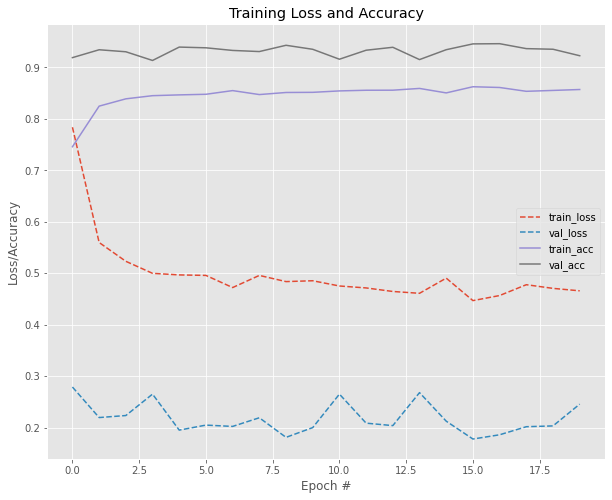

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(np.arange(0, 20), history.history["loss"], label="train_loss",linestyle='--')
ax.plot(np.arange(0, 20), history.history["val_loss"], label="val_loss",linestyle='--')
ax.plot(np.arange(0, 20), history.history["accuracy"], label="train_acc")
ax.plot(np.arange(0, 20), history.history["val_accuracy"], label="val_acc")
ax.set_title("Training Loss and Accuracy")
ax.set_xlabel("Epoch #")
ax.set_ylabel("Loss/Accuracy")
ax.legend()
plt.show()

In [ ]:
print("[INFO] {} kWh of electricity used since the begining".format(tracker.final_emissions_data.energy_consumed))
print("[INFO] Energy consumed for RAM: {} kWh".format(tracker.final_emissions_data.ram_energy))
print("[INFO] Energy consumed for all GPU: {} kWh".format(tracker.final_emissions_data.gpu_energy))
print("[INFO] Energy consumed for all CPU: {} kWh".format(tracker.final_emissions_data.cpu_energy))
print("[INFO] CO2 emission {}(in Kg)".format(tracker.final_emissions_data.emissions))

[INFO] 0.009244291377059231 kWh of electricity used since the begining
[INFO] Energy consumed for RAM: 0.0005664611738899134 kWh
[INFO] Energy consumed for all GPU: 0.003611365610487329 kWh
[INFO] Energy consumed for all CPU: 0.005066464592681992 kWh
[INFO] CO2 emission 0.003668830135034689(in Kg)


In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(test_x, batch_size=32)
print(classification_report(test_y.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=[str(i) for i in lb.classes_]))

[INFO] evaluating network...
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.92      0.93      1032
           3       0.87      0.95      0.91      1010
           4       0.96      0.90      0.92       982
           5       0.84      0.94      0.89       892
           6       0.97      0.93      0.95       958
           7       0.90      0.94      0.92      1028
           8       0.94      0.76      0.84       974
           9       0.86      0.93      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.92      0.92     10000



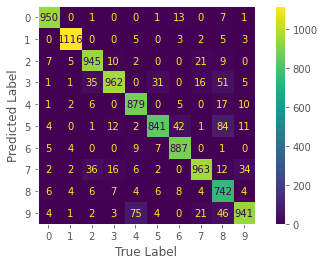

In [ ]:
fig_confusion_matrix, ax = plt.subplots(1,1,figsize=(7,4))
ConfusionMatrixDisplay(confusion_matrix(predictions.argmax(axis=1),
                                        test_y.argmax(axis=1)),
                       display_labels=lb.classes_).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
ax.grid(False)
plt.show()

In [ ]:
# Uploading figures
logger.info("Uploading figures")
run.log(
    {
        "confusion_matrix": wandb.Image(fig_confusion_matrix),
        # "other_figure": wandb.Image(other_fig)
    }
)

05-11-2022 22:24:25 Uploading figures


In [ ]:
# Evaluation Metrics
logger.info("Validation Evaluation metrics")
fbeta = fbeta_score(test_y.argmax(axis=1), 
                    predictions.argmax(axis=1), 
                    beta=1, zero_division=1,average='weighted')
precision = precision_score(test_y.argmax(axis=1),
                            predictions.argmax(axis=1),
                            zero_division=1,average='weighted')
recall = recall_score(test_y.argmax(axis=1),
                      predictions.argmax(axis=1),
                      zero_division=1,average='weighted')
acc = accuracy_score(test_y.argmax(axis=1),
                     predictions.argmax(axis=1))

logger.info("Validation Accuracy: {}".format(acc))
logger.info("Validation Precision: {}".format(precision))
logger.info("Validation Recall: {}".format(recall))
logger.info("Validation F1: {}".format(fbeta))

run.summary["Acc"] = acc
run.summary["Precision"] = precision
run.summary["Recall"] = recall
run.summary["F1"] = fbeta
# number of parameters
run.summary["Count_Params"] = model.count_params()
# energy unit is kWh
run.summary["Energy_Consumed"] = tracker.final_emissions_data.energy_consumed
run.summary["Energy_RAM"] = tracker.final_emissions_data.ram_energy
run.summary["Energy_GPU"] = tracker.final_emissions_data.gpu_energy
run.summary["Energy_CPU"] = tracker.final_emissions_data.cpu_energy
# kg
run.summary["CO2_Emissions"] = tracker.final_emissions_data.emissions

05-11-2022 22:24:36 Validation Evaluation metrics
05-11-2022 22:24:36 Validation Accuracy: 0.9226
05-11-2022 22:24:36 Validation Precision: 0.92541446136749
05-11-2022 22:24:36 Validation Recall: 0.9226
05-11-2022 22:24:36 Validation F1: 0.9223152026743395


In [ ]:
run.finish()

accuracy,▁▆▇▇▇▇█▇▇▇████▇██▇██
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▃▃▂▂▂▂▂▂▂▂▂▁▁▂▁▁▂▁▁
val_accuracy,▂▅▅▁▇▆▅▅▇▆▂▅▆▁▅██▆▆▃
val_loss,█▄▄▇▂▃▃▄▁▃▇▃▃▇▃▁▂▃▃▆
Acc,0.9226
CO2_Emissions,0.00367
Count_Params,61706
Energy_CPU,0.00507
Energy_Consumed,0.00924
Energy_GPU,0.00361


### Step 04: Hyperparameter tuning with W&B Sweep

**Define Sweep Configuration:**

In [ ]:
# Configure the sweep 
sweep_config = {
    'method': 'random', 
    'metric': {
      'name': 'val_accuracy',
      'goal': 'maximize'   
    },
    'parameters': {
        # Normal model
        'conv_layer': { 'max': 3, 'min': 1, 'distribution': 'int_uniform', },
        'filters': { 'values': [4, 6, 12, 16] },
        'learn_rate': { 'values': [0.01, 0.001, 0.005] },
        'epochs': { 'values': [10, 20, 30] },
        'batch_size': { 'values': [32,64] },

        # Augmentation
        'rotation_range': { 'values' : [20, 30, 40] },
        'width_shift_range': { 'values' : [0.15, 0.25, 0.35] },
        'height_shift_range': { 'values' : [0.1, 0.2, 0.3] },
        'shear_range' : { 'values' : [0.2, 0.3, 0.45] },
        'zoom_range' : { 'values' : [0.2, 0.5, 0.7] }
    }
}

Initialize a new sweep
Arguments:

* sweep_config: the sweep config dictionary defined above
* entity: Set the username for the sweep
* project: Set the project name for the sweep

In [ ]:
sweep_id = wandb.sweep(sweep_config,
                       entity="euripedes",
                       project=args["project_name"])

Create sweep with ID: 6mhr7id7
Sweep URL: https://wandb.ai/euripedes/lenet-5-augmentation/sweeps/6mhr7id7


**Adapting the model**

In [ ]:
class LeNetDataAug:
  @staticmethod
  def build(width, height, depth, classes, config):
    # initialize the model
    model = Sequential()
    inputShape = (height, width, depth)
    
    # if we are using "channels first", update the input shape
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
   
    # first set of CONV => TANH => POOL layers
    for i in range(config.conv_layer):
      model.add(Conv2D(config.filters, (5,5), strides=1, padding='same', 
                       activation='tanh', input_shape=inputShape ))
      model.add(AveragePooling2D())

    model.add(Flatten()) 
    model.add(Dense(120, activation='tanh')) 
    model.add(Dense(84, activation='tanh')) 

    # softmax classifier
    model.add(Dense(10, activation='softmax')) #Output layer
    
    # return the constructed network architecture
    return model

**Training**

In [ ]:
def train():
    with wandb.init() as run:

      # create codecarbon tracker
      # codecarbon is too much verbose, change the log level for more info
      tracker = EmissionsTracker(log_level="critical")
      tracker.start()

      # initialize the optimizer and model
      print("[INFO] compiling model...")
      opt = Adam(learning_rate=run.config.learn_rate)
      model = LeNetDataAug.build(width=28, height=28,depth=1, classes=10, config=run.config)
      model.compile(loss="categorical_crossentropy", 
                    optimizer=opt,
                    metrics=["accuracy"]
                    )
      
      # Configure the data generator for our sweep
      aug = ImageDataGenerator(rotation_range = run.config.rotation_range, 
                               width_shift_range = run.config.width_shift_range,
                               height_shift_range = run.config.height_shift_range, 
                               shear_range = run.config.shear_range, 
                               zoom_range = run.config.zoom_range,
                               horizontal_flip=False, 
                               fill_mode="nearest")

      # train the network
      print("[INFO] training network...")
      history = model.fit(aug.flow(train_x, train_y, 
                                   batch_size=run.config.batch_size),
                    validation_data=(test_x, test_y),
                    epochs=run.config.epochs, 
                    verbose=0,
                    callbacks=[wandb.keras.WandbCallback(save_model=False,
                                                         compute_flops=True)])


      # get co2 emissions from tracker
      # "CO2 emission (in Kg)"
      emissions = tracker.stop()

      # make predictions
      predictions = model.predict(test_x, batch_size=run.config.batch_size)

      # Evaluation Metrics
      logger.info("Validation Evaluation metrics")
      fbeta = fbeta_score(test_y.argmax(axis=1), 
                          predictions.argmax(axis=1), 
                          beta=1, zero_division=1,average='weighted')
      precision = precision_score(test_y.argmax(axis=1),
                                  predictions.argmax(axis=1),
                                  zero_division=1,average='weighted')
      recall = recall_score(test_y.argmax(axis=1),
                            predictions.argmax(axis=1),
                            zero_division=1,average='weighted')
      acc = accuracy_score(test_y.argmax(axis=1),
                          predictions.argmax(axis=1))

      logger.info("Validation Accuracy: {}".format(acc))
      logger.info("Validation Precision: {}".format(precision))
      logger.info("Validation Recall: {}".format(recall))
      logger.info("Validation F1: {}".format(fbeta))

      run.summary["Acc"] = acc
      run.summary["Precision"] = precision
      run.summary["Recall"] = recall
      run.summary["F1"] = fbeta
      # number of parameters
      run.summary["Count_Params"] = model.count_params()
      # energy unit is kWh
      run.summary["Energy_Consumed"] = tracker.final_emissions_data.energy_consumed
      run.summary["Energy_RAM"] = tracker.final_emissions_data.ram_energy
      run.summary["Energy_GPU"] = tracker.final_emissions_data.gpu_energy
      run.summary["Energy_CPU"] = tracker.final_emissions_data.cpu_energy
      # kg
      run.summary["CO2_Emissions"] = tracker.final_emissions_data.emissions

      run.finish()

In [ ]:
wandb.agent(sweep_id = sweep_id, function=train, count=10)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.
wandb: Agent Starting Run: g2x3sqkk with config:
wandb: 	batch_size: 32
wandb: 	conv_layer: 3
wandb: 	epochs: 20
wandb: 	filters: 4
wandb: 	height_shift_range: 0.2
wandb: 	learn_rate: 0.01
wandb: 	rotation_range: 40
wandb: 	shear_range: 0.3
wandb: 	width_shift_range: 0.35
wandb: 	zoom_range: 0.2


[INFO] compiling model...
[INFO] training network...
313/313 [==============================] - 1s 3ms/step


05-11-2022 22:51:05 Validation Evaluation metrics
05-11-2022 22:51:05 Validation Accuracy: 0.9793
05-11-2022 22:51:05 Validation Precision: 0.9793649140542641
05-11-2022 22:51:05 Validation Recall: 0.9793
05-11-2022 22:51:05 Validation F1: 0.979283434312393


313/313 [==============================] - 1s 2ms/step


05-11-2022 22:51:06 Validation Evaluation metrics
05-11-2022 22:51:06 Validation Accuracy: 0.8811
05-11-2022 22:51:06 Validation Precision: 0.8842833253744813
05-11-2022 22:51:06 Validation Recall: 0.8811
05-11-2022 22:51:06 Validation F1: 0.8808860571712521
wandb: Agent Starting Run: c5dqm357 with config:
wandb: 	batch_size: 64
wandb: 	conv_layer: 1
wandb: 	epochs: 10
wandb: 	filters: 12
wandb: 	height_shift_range: 0.2
wandb: 	learn_rate: 0.01
wandb: 	rotation_range: 20
wandb: 	shear_range: 0.3
wandb: 	width_shift_range: 0.35
wandb: 	zoom_range: 0.2
Exception in thread Thread-82:
Traceback (most recent call last):
  File "<ipython-input-32-7a08d25c7066>", line 64, in train
    run.summary["Acc"] = acc
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_summary.py", line 50, in __setitem__
    self.update({key: val})
  File "/usr/local/lib/python3.7/dist-packages/wandb/sdk/wandb_summary.py", line 72, in update
    self._update(record)
  File "/usr/local/lib/python3.7/dist-pa

[INFO] compiling model...
[INFO] training network...
157/157 [==============================] - 0s 2ms/step


05-11-2022 22:54:14 Validation Evaluation metrics
05-11-2022 22:54:14 Validation Accuracy: 0.781
05-11-2022 22:54:14 Validation Precision: 0.7896928864402812
05-11-2022 22:54:14 Validation Recall: 0.781
05-11-2022 22:54:14 Validation F1: 0.7773429207008805


accuracy,▁▅▆▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▁▁▁▁▁
val_accuracy,▁▂▄▄▄▆▅▇█▅
val_loss,█▇▅▅▄▂▃▂▁▃
Acc,0.781
CO2_Emissions,0.00155
Count_Params,293686
Energy_CPU,0.00206
Energy_Consumed,0.00391
Energy_GPU,0.00162


wandb: Agent Starting Run: hou8i3o8 with config:
wandb: 	batch_size: 32
wandb: 	conv_layer: 3
wandb: 	epochs: 30
wandb: 	filters: 6
wandb: 	height_shift_range: 0.1
wandb: 	learn_rate: 0.01
wandb: 	rotation_range: 20
wandb: 	shear_range: 0.45
wandb: 	width_shift_range: 0.35
wandb: 	zoom_range: 0.7


[INFO] compiling model...
[INFO] training network...
313/313 [==============================] - 1s 2ms/step


05-11-2022 23:05:02 Validation Evaluation metrics
05-11-2022 23:05:02 Validation Accuracy: 0.8443
05-11-2022 23:05:02 Validation Precision: 0.8516597358298117
05-11-2022 23:05:02 Validation Recall: 0.8443
05-11-2022 23:05:02 Validation F1: 0.8411807030809528


accuracy,▁▇▇█████████████▇▇▇█▇▇▇▇▇█▇▇▇▇
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▂▁▂▂▂▂▁▂▂▂▂
val_accuracy,▂▇█▇▆█▅▇▇▇▇▆▇▆█▆▇▇▃▄▂▅▆▁▆█▃█▆▂
val_loss,▇▄▁▂▅▁▅▃▃▃▃▄▄▄▃▄▃▃▇▅█▅▄█▄▂▆▃▅█
Acc,0.8443
CO2_Emissions,0.0056
Count_Params,19582
Energy_CPU,0.00743
Energy_Consumed,0.0141
Energy_GPU,0.00584


wandb: Agent Starting Run: 2g5gi2oe with config:
wandb: 	batch_size: 32
wandb: 	conv_layer: 2
wandb: 	epochs: 10
wandb: 	filters: 16
wandb: 	height_shift_range: 0.3
wandb: 	learn_rate: 0.005
wandb: 	rotation_range: 30
wandb: 	shear_range: 0.45
wandb: 	width_shift_range: 0.15
wandb: 	zoom_range: 0.5


[INFO] compiling model...
[INFO] training network...
313/313 [==============================] - 1s 2ms/step


05-11-2022 23:08:46 Validation Evaluation metrics
05-11-2022 23:08:46 Validation Accuracy: 0.9304
05-11-2022 23:08:46 Validation Precision: 0.931621664634556
05-11-2022 23:08:46 Validation Recall: 0.9304
05-11-2022 23:08:46 Validation F1: 0.9298828657844644


accuracy,▁▆▇▇▇█████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▃▇▇▄▇███▇
val_loss,█▆▂▃▄▂▁▁▂▂
Acc,0.9304
CO2_Emissions,0.00187
Count_Params,112046
Energy_CPU,0.00246
Energy_Consumed,0.00471
Energy_GPU,0.00197


wandb: Agent Starting Run: 0xjwhzpp with config:
wandb: 	batch_size: 64
wandb: 	conv_layer: 1
wandb: 	epochs: 20
wandb: 	filters: 6
wandb: 	height_shift_range: 0.2
wandb: 	learn_rate: 0.005
wandb: 	rotation_range: 30
wandb: 	shear_range: 0.3
wandb: 	width_shift_range: 0.25
wandb: 	zoom_range: 0.2


[INFO] compiling model...
[INFO] training network...
157/157 [==============================] - 0s 2ms/step


05-11-2022 23:14:48 Validation Evaluation metrics
05-11-2022 23:14:49 Validation Accuracy: 0.9397
05-11-2022 23:14:49 Validation Precision: 0.9401469525470604
05-11-2022 23:14:49 Validation Recall: 0.9397
05-11-2022 23:14:49 Validation F1: 0.9397863295447956


accuracy,▁▆▇▇▇███████████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅▆▄▆▅▆▇██▇▇▇▇▇▇▇█▇█
val_loss,█▄▃▅▃▄▃▂▁▁▂▂▁▂▂▁▂▁▁▁
Acc,0.9397
CO2_Emissions,0.00304
Count_Params,152410
Energy_CPU,0.00405
Energy_Consumed,0.00767
Energy_GPU,0.00317


wandb: Agent Starting Run: jbzlfwws with config:
wandb: 	batch_size: 64
wandb: 	conv_layer: 3
wandb: 	epochs: 20
wandb: 	filters: 12
wandb: 	height_shift_range: 0.1
wandb: 	learn_rate: 0.01
wandb: 	rotation_range: 30
wandb: 	shear_range: 0.3
wandb: 	width_shift_range: 0.35
wandb: 	zoom_range: 0.2


[INFO] compiling model...
[INFO] training network...
157/157 [==============================] - 0s 2ms/step


05-11-2022 23:21:06 Validation Evaluation metrics
05-11-2022 23:21:06 Validation Accuracy: 0.9476
05-11-2022 23:21:06 Validation Precision: 0.9481049342024835
05-11-2022 23:21:06 Validation Recall: 0.9476
05-11-2022 23:21:06 Validation F1: 0.9476311545917353


accuracy,▁▇██████████▇██████▇
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▂▁▁▁▁▁▁▁▁▁▁▂▁▁▁▁▁▂▂
val_accuracy,▄▃▃▅▇▄▇▅▄▅█▆▄▅▅▄▄▂▁▄
val_loss,▅▅▆▄▃▄▄▄▄▄▁▄▆▄▅▆▅▇█▆
Acc,0.9476
CO2_Emissions,0.00323
Count_Params,31630
Energy_CPU,0.00425
Energy_Consumed,0.00814
Energy_GPU,0.00341


wandb: Agent Starting Run: agm8g9nw with config:
wandb: 	batch_size: 32
wandb: 	conv_layer: 2
wandb: 	epochs: 30
wandb: 	filters: 16
wandb: 	height_shift_range: 0.3
wandb: 	learn_rate: 0.005
wandb: 	rotation_range: 30
wandb: 	shear_range: 0.2
wandb: 	width_shift_range: 0.15
wandb: 	zoom_range: 0.7


[INFO] compiling model...
[INFO] training network...
313/313 [==============================] - 1s 2ms/step


05-11-2022 23:32:33 Validation Evaluation metrics
05-11-2022 23:32:33 Validation Accuracy: 0.9294
05-11-2022 23:32:33 Validation Precision: 0.9319225383288146
05-11-2022 23:32:33 Validation Recall: 0.9294
05-11-2022 23:32:33 Validation F1: 0.9294666674464832


accuracy,▁▅▆▇▇▇▇███████████████████████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▃▅▆▇▆▇▇▇█▇█▇▇█▇██▇▇▇▇▇█▇▇▇▇█▇
val_loss,█▆▄▃▂▃▂▂▂▁▂▁▂▂▂▂▁▁▂▂▂▂▂▁▂▁▂▂▁▂
Acc,0.9294
CO2_Emissions,0.00599
Count_Params,112046
Energy_CPU,0.00787
Energy_Consumed,0.01509
Energy_GPU,0.00634


wandb: Agent Starting Run: xewege4w with config:
wandb: 	batch_size: 64
wandb: 	conv_layer: 1
wandb: 	epochs: 20
wandb: 	filters: 16
wandb: 	height_shift_range: 0.3
wandb: 	learn_rate: 0.001
wandb: 	rotation_range: 40
wandb: 	shear_range: 0.45
wandb: 	width_shift_range: 0.15
wandb: 	zoom_range: 0.5


[INFO] compiling model...
[INFO] training network...
157/157 [==============================] - 0s 2ms/step


05-11-2022 23:38:37 Validation Evaluation metrics
05-11-2022 23:38:37 Validation Accuracy: 0.9435
05-11-2022 23:38:37 Validation Precision: 0.9449829898244072
05-11-2022 23:38:37 Validation Recall: 0.9435
05-11-2022 23:38:37 Validation F1: 0.9433975664327089


accuracy,▁▅▆▆▇▇▇▇▇▇██████████
epoch,▁▁▂▂▂▃▃▄▄▄▅▅▅▆▆▇▇▇██
loss,█▅▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▅▆▆▇▇▇▇▇█▇███████▇█
val_loss,█▄▃▂▂▂▂▂▁▁▂▁▁▁▁▁▁▁▁▁
Acc,0.9435
CO2_Emissions,0.00309
Count_Params,387870
Energy_CPU,0.00407
Energy_Consumed,0.00779
Energy_GPU,0.00327


wandb: Agent Starting Run: znedrpy5 with config:
wandb: 	batch_size: 32
wandb: 	conv_layer: 1
wandb: 	epochs: 30
wandb: 	filters: 4
wandb: 	height_shift_range: 0.1
wandb: 	learn_rate: 0.005
wandb: 	rotation_range: 40
wandb: 	shear_range: 0.2
wandb: 	width_shift_range: 0.25
wandb: 	zoom_range: 0.5


[INFO] compiling model...
[INFO] training network...
313/313 [==============================] - 1s 2ms/step


05-11-2022 23:49:00 Validation Evaluation metrics
05-11-2022 23:49:00 Validation Accuracy: 0.9079
05-11-2022 23:49:00 Validation Precision: 0.9086264932173761
05-11-2022 23:49:00 Validation Recall: 0.9079
05-11-2022 23:49:00 Validation F1: 0.9076149604726337


accuracy,▁▆▆▇▇▇▇▇▇▇▇▇▇█████████████████
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▄▅▆▄▆▆▇▇▇▇█▇▇▇▇▇▇█▇█▇█▇▆█▇▇██
val_loss,█▅▄▃▅▄▃▃▂▂▂▁▁▁▂▂▂▂▁▂▁▂▁▂▃▁▂▂▁▂
Acc,0.9079
CO2_Emissions,0.00536
Count_Params,105318
Energy_CPU,0.00713
Energy_Consumed,0.0135
Energy_GPU,0.00558


wandb: Agent Starting Run: cw3w1wa3 with config:
wandb: 	batch_size: 64
wandb: 	conv_layer: 3
wandb: 	epochs: 10
wandb: 	filters: 4
wandb: 	height_shift_range: 0.3
wandb: 	learn_rate: 0.005
wandb: 	rotation_range: 20
wandb: 	shear_range: 0.2
wandb: 	width_shift_range: 0.25
wandb: 	zoom_range: 0.2


[INFO] compiling model...
[INFO] training network...
157/157 [==============================] - 0s 2ms/step


05-11-2022 23:52:19 Validation Evaluation metrics
05-11-2022 23:52:19 Validation Accuracy: 0.9623
05-11-2022 23:52:19 Validation Precision: 0.962792347552206
05-11-2022 23:52:19 Validation Recall: 0.9623
05-11-2022 23:52:19 Validation F1: 0.9623354288014012


accuracy,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▅▅▇▇█▇▆▇█
val_loss,█▄▄▂▂▁▂▃▂▁
Acc,0.9623
CO2_Emissions,0.00159
Count_Params,16366
Energy_CPU,0.00212
Energy_Consumed,0.00402
Energy_GPU,0.00166


Error in callback <function _WandbInit._pause_backend at 0x7f595b1e1680> (for post_run_cell):


BrokenPipeError: ignored

### Step 05: Train and Export the best model to W&B

With the results of Sweeps we know which configuration is the best and now we need to save it in our W&B project.

* It's important to understand that since we used the "random" method from WandB this model its not necessarily the best possible, it means that it was the best from all the combinations formed during the hyperparameter tuning process.  

Speak of it, that's the best configuration that Sweeps showed us:

* batch_size: 64
* conv_layer: 3
* epochs: 10
* filters: 4
* learn_rate: 0.005
* height_shift: 0.3
* width_shift: 0.25
* rotation: 20
* shear: 0.2
* zoom: 0.2

#### Creating the Best Model

In [ ]:
args = {
  "project_name": "lenet-5-augmentation",
  "encoder": "target_encoder"
}

In [ ]:
run = wandb.init(entity="euripedes",
                 project=args["project_name"], 
                 job_type="Final_model")

wandb: Currently logged in as: euripedes. Use `wandb login --relogin` to force relogin


#### Fetch, Preprocessing and Data Segregation

***Run the same process we did before!***

#### Training

In [ ]:
class UpdatedLeNet:
  @staticmethod
  def build(width, height, depth, classes):
    # initialize the model
    model = Sequential()
    inputShape = (height, width, depth)
    
    # if we are using "channels first", update the input shape
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
   
    # first set of CONV => TANH => POOL layers
    for i in range(3):
      model.add(Conv2D(4, (5, 5), strides=1, padding='same',
                      activation='tanh', input_shape=(28,28,1), ))
      model.add(AveragePooling2D()) 

    # a flatten and two set of FC => TANH layers
    model.add(Flatten()) #Flatten
    model.add(Dense(120, activation='tanh'))
    model.add(Dense(84, activation='tanh'))

    # softmax classifier
    model.add(Dense(10, activation='softmax')) #Output layer
    
    # return the constructed network architecture
    return model

In [ ]:
# create codecarbon tracker
# codecarbon is too much verbose, change the log level for more info
tracker = EmissionsTracker(log_level="critical")
tracker.start()

# initialize the optimizer and model
logger.info("[INFO] compiling model...")
opt = Adam(learning_rate=0.005)
model = UpdatedLeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

# construct the image generator for data augmentation then
# initialize the total number of images generated thus far
aug = ImageDataGenerator(rotation_range=20, width_shift_range=0.25,
                         height_shift_range=0.3, shear_range=0.2, 
                         zoom_range=0.2,
                         horizontal_flip=False, fill_mode="nearest")

# train the network
logger.info("[INFO] training network...")
history = model.fit(aug.flow(train_x, train_y, batch_size=64),
                    validation_data=(test_x, test_y),
                    epochs=10, 
                    verbose=0,
                    callbacks=[wandb.keras.WandbCallback(save_model=False,
                                                         compute_flops=True)])

# get co2 emissions from tracker
# "CO2 emission (in Kg)"
emissions = tracker.stop()

06-11-2022 00:06:53 [INFO] compiling model...
06-11-2022 00:06:53 [INFO] training network...
06-11-2022 00:06:53 From /usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/nn_ops.py:5219: tensor_shape_from_node_def_name (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


#### Evaluation Metrics

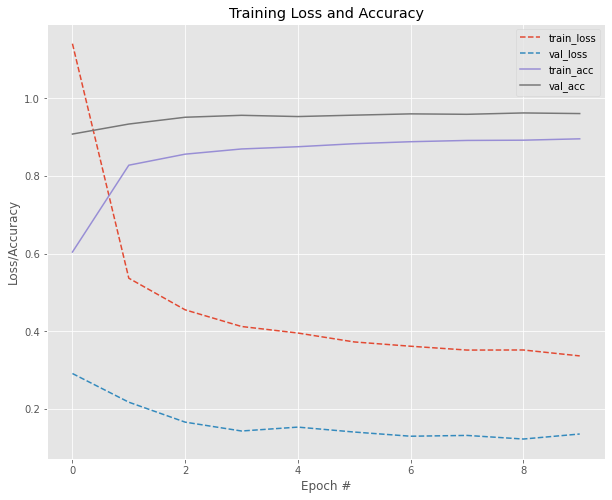

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(np.arange(0, 10), history.history["loss"], label="train_loss",linestyle='--')
ax.plot(np.arange(0, 10), history.history["val_loss"], label="val_loss",linestyle='--')
ax.plot(np.arange(0, 10), history.history["accuracy"], label="train_acc")
ax.plot(np.arange(0, 10), history.history["val_accuracy"], label="val_acc")
ax.set_title("Training Loss and Accuracy")
ax.set_xlabel("Epoch #")
ax.set_ylabel("Loss/Accuracy")
ax.legend()
plt.show()

In [ ]:
print("[INFO] {} kWh of electricity used since the begining".format(tracker.final_emissions_data.energy_consumed))
print("[INFO] Energy consumed for RAM: {} kWh".format(tracker.final_emissions_data.ram_energy))
print("[INFO] Energy consumed for all GPU: {} kWh".format(tracker.final_emissions_data.gpu_energy))
print("[INFO] Energy consumed for all CPU: {} kWh".format(tracker.final_emissions_data.cpu_energy))
print("[INFO] CO2 emission {}(in Kg)".format(tracker.final_emissions_data.emissions))


[INFO] 0.00401040381418897 kWh of electricity used since the begining
[INFO] Energy consumed for RAM: 0.000252571246478027 kWh
[INFO] Energy consumed for all GPU: 0.0014988372699942193 kWh
[INFO] Energy consumed for all CPU: 0.0022589952977167243 kWh
[INFO] CO2 emission 0.0025304972853051723(in Kg)


In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(test_x, batch_size=32)
print(classification_report(test_y.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=[str(i) for i in lb.classes_]))

[INFO] evaluating network...
313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.95      0.98      0.96      1032
           3       0.98      0.95      0.96      1010
           4       0.96      0.96      0.96       982
           5       0.98      0.92      0.95       892
           6       0.99      0.93      0.96       958
           7       0.95      0.97      0.96      1028
           8       0.93      0.95      0.94       974
           9       0.91      0.97      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



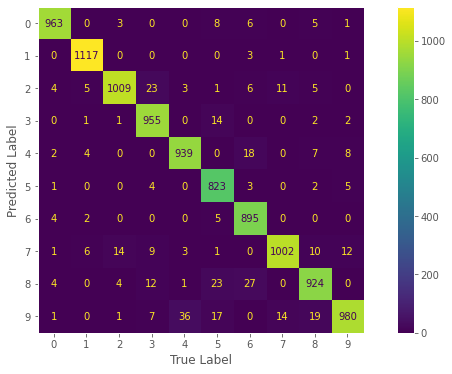

In [ ]:
fig_confusion_matrix, ax = plt.subplots(1,1,figsize=(12,6))
ConfusionMatrixDisplay(confusion_matrix(predictions.argmax(axis=1),
                                        test_y.argmax(axis=1)),
                       display_labels=lb.classes_).plot(values_format=".0f",ax=ax)

ax.set_xlabel("True Label")
ax.set_ylabel("Predicted Label")
ax.grid(False)
plt.show()

In [ ]:
# Uploading figures
logger.info("Uploading figures")
run.log(
    {
        "confusion_matrix": wandb.Image(fig_confusion_matrix),
        # "other_figure": wandb.Image(other_fig)
    }
)

06-11-2022 00:12:47 Uploading figures


In [ ]:
# Evaluation Metrics
logger.info("Validation Evaluation metrics")
fbeta = fbeta_score(test_y.argmax(axis=1), 
                    predictions.argmax(axis=1), 
                    beta=1, zero_division=1,average='weighted')
precision = precision_score(test_y.argmax(axis=1),
                            predictions.argmax(axis=1),
                            zero_division=1,average='weighted')
recall = recall_score(test_y.argmax(axis=1),
                      predictions.argmax(axis=1),
                      zero_division=1,average='weighted')
acc = accuracy_score(test_y.argmax(axis=1),
                     predictions.argmax(axis=1))

logger.info("Validation Accuracy: {}".format(acc))
logger.info("Validation Precision: {}".format(precision))
logger.info("Validation Recall: {}".format(recall))
logger.info("Validation F1: {}".format(fbeta))

run.summary["Acc"] = acc
run.summary["Precision"] = precision
run.summary["Recall"] = recall
run.summary["F1"] = fbeta
# number of parameters
run.summary["Count_Params"] = model.count_params()
# energy unit is kWh
run.summary["Energy_Consumed"] = tracker.final_emissions_data.energy_consumed
run.summary["Energy_RAM"] = tracker.final_emissions_data.ram_energy
run.summary["Energy_GPU"] = tracker.final_emissions_data.gpu_energy
run.summary["Energy_CPU"] = tracker.final_emissions_data.cpu_energy
# kg
run.summary["CO2_Emissions"] = tracker.final_emissions_data.emissions

06-11-2022 00:12:57 Validation Evaluation metrics
06-11-2022 00:12:57 Validation Accuracy: 0.9607
06-11-2022 00:12:57 Validation Precision: 0.9615428118319694
06-11-2022 00:12:58 Validation Recall: 0.9607
06-11-2022 00:12:58 Validation F1: 0.9607780495135098


Now we can finish our process! ✅

In [ ]:
run.finish()

accuracy,▁▆▇▇██████
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
val_accuracy,▁▄▇▇▇▇████
val_loss,█▅▃▂▂▂▁▁▁▂
Acc,0.9607
CO2_Emissions,0.00253
Count_Params,16366
Energy_CPU,0.00226
Energy_Consumed,0.00401
Energy_GPU,0.0015
